# INSTITUTO NACIONAL DE ANTROPOLOGÍA E HISTORIA
## CIUDAD DE MEXÍCO

---

This is a challenge to Platzi Master. 
https://github.com/PlatziMaster/challenge-prework-ds

## 1. Preparing the work enviroment

In [79]:
import os

import numpy as np
import pandas as pd
import scipy
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import calendar

## 2. Load and read DataSet

In [2]:
# Path
path = 'C:\\Users\\melen\\Dropbox\\Python\\Reto_Data_Science_INAH\\db'
os.chdir(path)
os.getcwd()

'C:\\Users\\melen\\Dropbox\\Python\\Reto_Data_Science_INAH\\db'

In [3]:
# Reading and load DataBase
df = pd.read_csv('INAH-DB.csv', sep=';', encoding='latin-1')
df.sample(10)

,Estado,Clave SIINAH,Siglas,Centro de trabajo,Año,Mes,Tipo de visitantes,Número de visitas,Nacionalidad
35303,Tamaulipas,3120039.0,Z.A.,Z.A. de El Sabinito,2019,4,Discapacitados,0,Nacional
24393,Oaxaca,4100005.0,M.- M.H,Ex-Convento de Coixtlahuaca,2019,11,Discapacitados,0,Nacional
19658,Jalisco,2300800.0,M.- M.H,Museo Regional de Guadalajara,2019,7,Entrada sin costo,459,Nacional
19237,Jalisco,2402300.0,M.- M.H,"Museo ""Casa Agustín Rivera""",2019,10,"Tercera edad, pensionados y jubilados",0,Nacional
35299,Tamaulipas,3120039.0,Z.A.,Z.A. de El Sabinito,2019,4,"Tercera edad, pensionados y jubilados",49,Nacional
38267,Veracruz,3110016.0,Z.A.,Z.A. de El Tajín,2019,4,Discapacitados,138,Nacional
18590,Hidalgo,3120136.0,Z.A.,Z.A Pahñú,2019,9,Trabajadores INAH,3,Nacional
26739,Oaxaca,3110025.0,Z.A.,Z.A. de Monte Albán con museo de sitio,2019,11,Entrada dominical,"13,791",Nacional
38234,Veracruz,3110016.0,Z.A.,Z.A. de El Tajín,2019,2,Discapacitados,26,Nacional
20873,Michoacán,3120047.0,Z.A.,Z.A. de Huandacareo,2019,4,Exposiciones temporales con costo adicional,0,Nacional


### 2.1 DataBase General Information

Estado, Clave SIINAH, Centro de trabajo, Año, Mes, Tipo de visitantes, Número de visitas y Nacionalidad.

In [4]:
df.shape

(42679, 9)

In [5]:
# we can know the variety of the data that make up the dataframe
df.nunique()

Estado                  32
Clave SIINAH           271
Siglas                   2
Centro de trabajo      277
Año                      1
Mes                     12
Tipo de visitantes      10
Número de visitas     3307
Nacionalidad             2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42679 entries, 0 to 42678
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estado              42679 non-null  object 
 1   Clave SIINAH        42497 non-null  float64
 2   Siglas              42679 non-null  object 
 3   Centro de trabajo   42679 non-null  object 
 4   Año                 42679 non-null  int64  
 5   Mes                 42679 non-null  int64  
 6   Tipo de visitantes  42679 non-null  object 
 7   Número de visitas   42679 non-null  object 
 8   Nacionalidad        42679 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.9+ MB


### 2.2 Cleaning and preparing Dataset

In [7]:
dfn = df.convert_dtypes()
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42679 entries, 0 to 42678
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Estado              42679 non-null  string
 1   Clave SIINAH        42497 non-null  Int64 
 2   Siglas              42679 non-null  string
 3   Centro de trabajo   42679 non-null  string
 4   Año                 42679 non-null  Int64 
 5   Mes                 42679 non-null  Int64 
 6   Tipo de visitantes  42679 non-null  string
 7   Número de visitas   42679 non-null  string
 8   Nacionalidad        42679 non-null  string
dtypes: Int64(3), string(6)
memory usage: 3.1 MB


In [8]:
# Replace number month to name month
#dfn['Mes'] = dfn['Mes'].apply(lambda x: calendar.month_name[x])

In [9]:
dfn['Mes'].sample(5)

33029    3
23980    3
23197    3
29284    3
18755    9
Name: Mes, dtype: Int64

In [10]:
# Converting 'Número de visitas' from string to int
dfn['Número de visitas'] = dfn['Número de visitas'].apply(lambda x: x.replace(',',''))
dfn['Número de visitas'] = dfn['Número de visitas'].apply(lambda x: int(x))
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42679 entries, 0 to 42678
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Estado              42679 non-null  string
 1   Clave SIINAH        42497 non-null  Int64 
 2   Siglas              42679 non-null  string
 3   Centro de trabajo   42679 non-null  string
 4   Año                 42679 non-null  Int64 
 5   Mes                 42679 non-null  Int64 
 6   Tipo de visitantes  42679 non-null  string
 7   Número de visitas   42679 non-null  int64 
 8   Nacionalidad        42679 non-null  string
dtypes: Int64(3), int64(1), string(5)
memory usage: 3.1 MB


In [11]:
# Order Data Frame
dfn.sort_values(['Mes'])

,Estado,Clave SIINAH,Siglas,Centro de trabajo,Año,Mes,Tipo de visitantes,Número de visitas,Nacionalidad
0,Aguascalientes,2300100,M.- M.H,Museo Regional de Historia de Aguascalientes,2019,1,Estudiantes nivel básico,527,Nacional
28474,Puebla,4100016,M.- M.H,Museo de sitio de Teteles del Santo Nombre con...,2019,1,Profesores,0,Nacional
28475,Puebla,4100016,M.- M.H,Museo de sitio de Teteles del Santo Nombre con...,2019,1,Discapacitados,0,Nacional
28476,Puebla,4100016,M.- M.H,Museo de sitio de Teteles del Santo Nombre con...,2019,1,Entrada sin costo,1646,Nacional
28477,Puebla,4100016,M.- M.H,Museo de sitio de Teteles del Santo Nombre con...,2019,1,Estudiantes nivel básico,0,Nacional
...,...,...,...,...,...,...,...,...,...
36499,Tlaxcala,3110105,Z.A.,Z.A. de Xochitécatl con museo de sitio,2019,12,Discapacitados,6,Nacional
36498,Tlaxcala,3110105,Z.A.,Z.A. de Xochitécatl con museo de sitio,2019,12,Profesores,75,Nacional
36497,Tlaxcala,3110105,Z.A.,Z.A. de Xochitécatl con museo de sitio,2019,12,Entrada sin costo,0,Extranjeros
2650,Campeche,3120020,Z.A.,Z.A. de Chunhuhub,2019,12,Discapacitados,0,Nacional


## 3. Statistical Parameters

### 3.1 Totals by State and Temporality (Month and year)

In [95]:
# Group data by 'Estado', 'Año' and 'Mes'
df_state_temporality = dfn.groupby(['Estado', 'Año', 'Mes'])['Número de visitas'].sum().to_frame()
df_state_temporality.unstack('Mes')

Número de visitas                                  \
Mes                                     1       2       3       4       5    
Estado              Año                                                      
Aguascalientes      2019              1776    1978    2287    3777    2469   
Baja California     2019              2206    2266    2899    2856    2442   
Baja California Sur 2019              4356    6981    4527    5988    3938   
Campeche            2019             29936   21583   24365   29418   16383   
Chiapas             2019            113156   83314   98547  175991   77685   
Chihuahua           2019             10707   11250   16485   23470   11614   
Ciudad de México    2019            770097  705316  698557  923938  523592   
Coahuila            2019              2472    1846    1512    3363    3976   
Colima              2019              3048    3444    4209    4664    4483   
Durango             2019              1224    1317    1804    1558     731   
Estado de México    2019            426682  372331  490242  529516  265416   
Guanajuato          2019             62707   36851   34277   59159   33361   
Guerrero            2019             16587   16255   16257   17972   10527   
Hidalgo             2019             29147   39323   51295   48295   22354   
Jalisco             2019             32866   36219   35764   52211   23282   
Michoacán           2019             12487   14139   17481   24923   12955   
Morelos             2019             63425   52580   66167   72007   37098   
Nayarit             2019              3113    1878    3585    3058    2035   
Nuevo León          2019              2430    3426    5406    2744    2577   
Oaxaca              2019             71043   57421   82301  107360   58175   
Puebla              2019            108326   75288   79426  108375   69970   
Querétaro           2019              9469   14452   20669   26079   17285   
Quintana Roo        2019            410453  270949  291705  374813  255570   
San Luis Potosí     2019              3490    2574    3597    4757    4502   
Sinaloa             2019              1824    1660    4764    3362    4671   
Sonora              2019               400     118     303     327     196   
Tabasco             2019              6295    5920    7946   22234    7099   
Tamaulipas          2019               914     662     854    1288     780   
Tlaxcala            2019             23005   18653   17380   25274   15829   
Veracruz            2019             45403   49664   84102  115636   64526   
Yucatán             2019            372551  243412  325993  304696  235017   
Zacatecas           2019              6489    6823    9564   11406    5747   

                                                                          \
Mes                           6       7       8       9       10      11   
Estado              Año                                                    
Aguascalientes      2019    1780    2797    1656    2445    2708    3163   
Baja California     2019    2446    3399    1793     771    1588    1484   
Baja California Sur 2019    2183    5162    4732    3797    5312    4024   
Campeche            2019   13283   31011   23286   12013   14809   21348   
Chiapas             2019   57493  154195   80425   60288   87498  104691   
Chihuahua           2019   11535   14785   12736   11029   15053   13889   
Ciudad de México    2019  494911  534564  554122  670283  884577  886276   
Coahuila            2019    3896    5264    3388       5       8       0   
Colima              2019    4537    4074    3767    3110    3349    4336   
Durango             2019    1064    1271    1069     744    1130    1058   
Estado de México    2019  262059  368040  332404  390866  391441  342686   
Guanajuato          2019   37733   56801   56460   40022   42927   49557   
Guerrero            2019   11292   14561   13843    9621   15272   12633   
Hidalgo             2019   25062   41556   32663   21331   21469   29032   
Ja

**Sample Graph: Total Aguascalientes State per Year and Month**

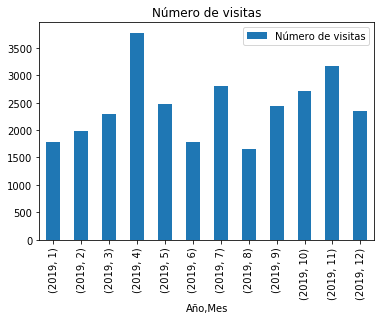

In [111]:
# Set DF to graph
df_graph = df_state_temporality.loc["Aguascalientes"]
ax = df_graph.plot.bar(subplots=True)

### 3.2 Totals by State and Type Visitor

In [143]:
# Group data by 'Estado', and 'Visitante'
df_state_type_visitor = dfn.groupby(['Estado', 'Año', 'Tipo de visitantes'])['Número de visitas'].sum().to_frame()
df_state_type_visitor.unstack('Tipo de visitantes')

Número de visitas                                   \
Tipo de visitantes           Boleto pagado Discapacitados Entrada dominical   
Estado              Año                                                       
Aguascalientes      2019              1832             57             10359   
Baja California     2019              1826             70              8174   
Baja California Sur 2019             11132             52             10492   
Campeche            2019            109922            412             76926   
Chiapas             2019            281955            199            280817   
Chihuahua           2019              5315             89             20198   
Ciudad de México    2019           1404486          33112           3773402   
Coahuila            2019                 0              6              3654   
Colima              2019              2993              0              8957   
Durango             2019                 0              0              4363   
Estado de México    2019           1337778           1401           2391096   
Guanajuato          2019            129932           1007            138200   
Guerrero            2019             21590            333             35245   
Hidalgo             2019             40870           1152            167479   
Jalisco             2019             57310           1362             76415   
Michoacán           2019             28664            144             92092   
Morelos             2019            154623           2153            230929   
Nayarit             2019              5106            126              6933   
Nuevo León          2019              2252              5             16015   
Oaxaca              2019            355639           1988            254438   
Puebla              2019            238325           1342            367057   
Querétaro           2019             21491            173            107138   
Quintana Roo        2019           2561421           1591            243047   
San Luis Potosí     2019              4634            153             13934   
Sinaloa             2019              6878            117             11309   
Sonora              2019                 0              0               400   
Tabasco             2019             11289            264             42879   
Tamaulipas          2019               818             46              4096   
Tlaxcala            2019             25748            334            155072   
Veracruz            2019            222822           7302            369318   
Yucatán             2019           2293200           3063            510895   
Zacatecas           2019             22837             80             37207   

                                                                     \
Tipo de visitantes       Entrada sin costo Estudiantes nivel básico   
Estado              Año                                               
Aguascalientes      2019              4359                     7570   
Baja California     2019              5779                     4368   
Baja California Sur 2019             16341                     9470   
Campeche            2019              4643                    23249   
Chiapas             2019            209166                   142256   
Chihuahua           2019             60516                    37291   
Ciudad de México    2019            360443                  1179394   
Coahuila            2019             20850                      725   
Colima              2019              9501                    12081   
Durango             2019              5404                     2453   
Estado de México    2019            489759                   158680   
Guanajuato          2019             50697                    86102   
Guerrero            2019             19620                    27464   
Hidalgo             2019             23845                    56742   
Jalisco             2019             90400          

### 3.3 Total by State by Type Visitor and Temporality(Month and Year)

In [146]:
# Group data by 'Estado', 'Visitante' and Temporality
df_state_type_visitor_temporality = dfn.groupby(['Estado', 'Tipo de visitantes', 'Año', 'Mes'])['Número de visitas'].sum().to_frame()
df_state_type_visitor_temporality.unstack()

Número de visitas  \
Mes                                                                            1    
Estado         Tipo de visitantes                          Año                      
Aguascalientes Boleto pagado                               2019                99   
               Discapacitados                              2019                 3   
               Entrada dominical                           2019               617   
               Entrada sin costo                           2019               167   
               Estudiantes nivel básico                    2019               527   
...                                                                           ...   
Zacatecas      Estudiantes nivel superior                  2019               823   
               Exposiciones temporales con costo adicional 2019                 0   
               Profesores                                  2019               377   
               Tercera edad, pensionados y jubilados       2019               423   
               Trabajadores INAH                           2019                 0   

                                                                            \
Mes                                                               2     3    
Estado         Tipo de visitantes                          Año               
Aguascalientes Boleto pagado                               2019   92   110   
               Discapacitados                              2019    1     1   
               Entrada dominical                           2019  812   954   
               Entrada sin costo                           2019  275   285   
               Estudiantes nivel básico                    2019  542   498   
...                                                              ...   ...   
Zacatecas      Estudiantes nivel superior                  2019  675  1753   
               Exposiciones temporales con costo adicional 2019    0     0   
               Profesores                                  2019  415   502   
               Tercera edad, pensionados y jubilados       2019  385   757   
               Trabajadores INAH                           2019    0     1   

                                                                            \
Mes                                                                4    5    
Estado         Tipo de visitantes                          Año               
Aguascalientes Boleto pagado                               2019   333  123   
               Discapacitados                              2019     8    1   
               Entrada dominical                           2019  1342  944   
               Entrada sin costo                           2019   488  477   
               Estudiantes nivel básico                    2019   818  337   
...                                                               ...  ...   
Zacatecas      Estudiantes nivel superior                  2019  1793  841   
               Exposiciones temporales con costo adicional 2019     0    0   
               Profesores                                  2019   737  379   
               Tercera edad, pensionados y jubilados       2019  1042  638   
               Trabajadores INAH                           2019     4    0   

                                                                            \
Mes                                                               6     7    
Estado         Tipo de visitantes                          Año               
Aguascalientes Boleto pagado                               2019  121   266   
               Discapacitados                              2019    8     2   
               Entrada dominical                           2019  650  1093   
               Entrada sin costo                           2019  352   384   
               Estudiantes nivel básico                    2019  407   515   
...                                                            

### 3.4 Totals by Job Center and Temporality (Month and Year)

In [147]:
df_job_center_temporality = dfn.groupby(['Centro de trabajo','Año','Mes'])['Número de visitas'].sum().to_frame()
df_job_center_temporality.unstack('Mes')

Número de visitas                  \
Mes                                                        1       2       3    
Centro de trabajo                      Año                                      
Capilla Abierta de Tlalmanalco         2019            1172.0  1382.0  1298.0   
Capilla Abierta del Templo de Calimaya 2019             214.0   348.0   782.0   
Casa de Hidalgo                        2019            8680.0  5941.0  4225.0   
Casa de la Palestina                   2019               0.0     0.0     0.0   
Casa del Dean                          2019             924.0  1323.0  1287.0   
...                                                       ...     ...     ...   
Z.A. de Yagul                          2019             878.0  1154.0  1292.0   
Z.A. de Yautepec                       2019             136.0    66.0   381.0   
Z.A. de Yaxchilán                      2019            7395.0  6207.0  6627.0   
Z.A. de Yohualichan                    2019            4432.0  3108.0  4157.0   
Z.A. de Zaachila                       2019             312.0   165.0   186.0   

                                                                              \
Mes                                               4       5       6       7    
Centro de trabajo                      Año                                     
Capilla Abierta de Tlalmanalco         2019   1268.0   614.0  1005.0  1356.0   
Capilla Abierta del Templo de Calimaya 2019   3160.0   220.0   464.0  1014.0   
Casa de Hidalgo                        2019   9054.0  5342.0  5472.0  8537.0   
Casa de la Palestina                   2019      0.0     0.0     0.0     0.0   
Casa del Dean                          2019   1072.0   900.0  1113.0  1206.0   
...                                              ...     ...     ...     ...   
Z.A. de Yagul                          2019   1275.0   717.0  1072.0  1633.0   
Z.A. de Yautepec                       2019    212.0   100.0   110.0   192.0   
Z.A. de Yaxchilán                      2019  10232.0  5411.0  3408.0  7784.0   
Z.A. de Yohualichan                    2019   7008.0  4251.0  3931.0  6226.0   
Z.A. de Zaachila                       2019    471.0   229.0   246.0   796.0   

                                                                             \
Mes                                              8       9       10      11   
Centro de trabajo                      Año                                    
Capilla Abierta de Tlalmanalco         2019  1365.0  1392.0  1116.0  1266.0   
Capilla Abierta del Templo de Calimaya 2019   338.0   542.0   456.0   440.0   
Casa de Hidalgo                        2019  7558.0  7679.0  4672.0  6966.0   
Casa de la Palestina                   2019     0.0     0.0     0.0     0.0   
Casa del Dean                          2019  1737.0  1844.0  1598.0  1867.0   
...                                             ...     ...     ...     ...   
Z.A. de Yagul                          2019  1105.0   751.0   808.0  1746.0   
Z.A. de Yautepec                       2019   181.0   300.0   152.0   115.0   
Z.A. de Yaxchilán                      2019  2892.0  2647.0  2706.0  8389.0   
Z.A. de Yohualichan                    2019  4698.0  3449.0  4942.0  4455.0   
Z.A. de Zaachila                       2019   371.0   182.0   267.0   303.0   

                                                     
Mes                                              12  
Centro de trabajo                      Año           
Capilla Abierta de Tlalmanalco         2019  1227.0  
Capilla Abierta del Templo de Calimaya 2019   190.0  
Casa de Hidalgo                        2019  4825.0  
Casa de la Palestina                   2019     0.0  
Casa del Dean                          2019  1147.0  
...                                             ...  
Z.A. de Yagul                          2019  2102.0  
Z.A. de Yautepec                       2019   128.0  
Z.A. de Yaxchilán                      2019  7873.0  
Z.A. de Yohualichan              

### 3.5 Totals by Job Center and Type Visitors (Year)

In [148]:
df_job_center_type_visitors = dfn.groupby(['Centro de trabajo', 'Tipo de visitantes', 'Año'])['Número de visitas'].sum().to_frame()
df_job_center_type_visitors.unstack('Tipo de visitantes')

Número de visitas                 \
Tipo de visitantes                              Boleto pagado Discapacitados   
Centro de trabajo                      Año                                     
Capilla Abierta de Tlalmanalco         2019                89             75   
Capilla Abierta del Templo de Calimaya 2019                 0             21   
Casa de Hidalgo                        2019             19622             47   
Casa de la Palestina                   2019                 0              0   
Casa del Dean                          2019              1398             77   
...                                                       ...            ...   
Z.A. de Yagul                          2019              4634             51   
Z.A. de Yautepec                       2019                 0              1   
Z.A. de Yaxchilán                      2019                 0              0   
Z.A. de Yohualichan                    2019             12710             67   
Z.A. de Zaachila                       2019              1451             13   

                                                               \
Tipo de visitantes                          Entrada dominical   
Centro de trabajo                      Año                      
Capilla Abierta de Tlalmanalco         2019              4606   
Capilla Abierta del Templo de Calimaya 2019              1324   
Casa de Hidalgo                        2019             23884   
Casa de la Palestina                   2019                 0   
Casa del Dean                          2019              3404   
...                                                       ...   
Z.A. de Yagul                          2019              4472   
Z.A. de Yautepec                       2019               386   
Z.A. de Yaxchilán                      2019             24139   
Z.A. de Yohualichan                    2019             29633   
Z.A. de Zaachila                       2019              1338   

                                                               \
Tipo de visitantes                          Entrada sin costo   
Centro de trabajo                      Año                      
Capilla Abierta de Tlalmanalco         2019              6962   
Capilla Abierta del Templo de Calimaya 2019              3933   
Casa de Hidalgo                        2019               611   
Casa de la Palestina                   2019                 0   
Casa del Dean                          2019               641   
...                                                       ...   
Z.A. de Yagul                          2019                 0   
Z.A. de Yautepec                       2019                41   
Z.A. de Yaxchilán                      2019             15342   
Z.A. de Yohualichan                    2019               247   
Z.A. de Zaachila                       2019                17   

                                                                      \
Tipo de visitantes                          Estudiantes nivel básico   
Centro de trabajo                      Año                             
Capilla Abierta de Tlalmanalco         2019                      633   
Capilla Abierta del Templo de Calimaya 2019                      972   
Casa de Hidalgo                        2019                    14921   
Casa de la Palestina                   2019                        0   
Casa del Dean                          2019                     2775   
...                                                              ...   
Z.A. de Yagul                          2019                     2363   
Z.A. de Yautepec                       2019                      441   
Z.A. de Yaxchilán                      2019                    11182   
Z.A. de Yohualichan                    2019                     3425   
Z.A. de Zaachila                       2019                      605   

                                                                        \
Tipo de visitantes

### 3.6 Mean of Visitors by State and Temporality (Month and year)

In [150]:
df_mean_visitors_state_temporality = dfn.groupby(['Estado', 'Año', 'Mes'])['Número de visitas'].mean().to_frame()
df_mean_visitors_state_temporality.rename(columns = {'Número de visitas' : 'Promedio de Visitas'}, inplace = True)
df_mean_visitors_state_temporality.unstack(['Año','Mes'])

Promedio de Visitas                            \
Año                                2019                             
Mes                                  1            2            3    
Estado                                                              
Aguascalientes               136.615385   152.153846   175.923077   
Baja California               84.846154    87.153846   111.500000   
Baja California Sur           67.015385   107.400000    69.646154   
Campeche                     115.138462    83.011538    93.711538   
Chiapas                      621.736264   457.769231   541.467033   
Chihuahua                    137.269231   144.230769   211.346154   
Ciudad de México            4936.519231  4521.256410  4477.929487   
Coahuila                     190.153846   142.000000   116.307692   
Colima                        78.153846    88.307692   107.923077   
Durango                       94.153846   101.307692   138.769231   
Estado de México            1262.372781  1101.571006  1450.420118   
Guanajuato                   438.510490   257.699301   239.699301   
Guerrero                     106.326923   104.198718   104.211538   
Hidalgo                      280.259615   378.105769   493.221154   
Jalisco                      421.358974   464.346154   458.512821   
Michoacán                     87.321678    98.874126   122.244755   
Morelos                      443.531469   367.692308   462.706294   
Nayarit                       79.820513    48.153846    91.923077   
Nuevo León                    93.461538   131.769231   207.923077   
Oaxaca                       303.602564   245.388889   351.713675   
Puebla                       438.566802   304.809717   321.562753   
Querétaro                    145.676923   222.338462   317.984615   
Quintana Roo                2428.715976  1603.248521  1726.065089   
San Luis Potosí               89.487179    66.000000    92.230769   
Sinaloa                       70.153846    63.846154   183.230769   
Sonora                        15.384615     4.538462    11.653846   
Tabasco                       69.175824    65.054945    87.318681   
Tamaulipas                    23.435897    16.974359    21.897436   
Tlaxcala                     294.935897   239.141026   222.820513   
Veracruz                     205.443439   224.723982   380.552036   
Yucatán                     1508.303644   985.473684  1319.809717   
Zacatecas                    166.384615   174.948718   245.230769   

                                                                         \
Año                                                                       
Mes                           4            5            6            7    
Estado                                                                    
Aguascalientes        290.538462   189.923077   136.923077   215.153846   
Baja California       109.846154    93.923077    94.076923   130.730769   
Baja California Sur    92.123077    60.584615    33.584615    79.415385   
Campeche              113.146154    63.011538    51.088462   119.273077   
Chiapas               966.983516   426.840659   315.895604   847.225275   
Chihuahua             300.897436   148.897436   147.884615   189.551282   
Ciudad de México     5922.679487  3356.358974  3172.506410  3426.692308   
Coahuila              258.692308   305.846154   299.692308   404.923077   
Colima                119.589744   114.948718   116.333333   104.461538   
Durango               119.846154    56.230769    81.846154    97.769231   
Estado de México     1566.615385   785.254438   775.322485  1088.875740   
Guanajuato            413.699301   233.293706   263.867133   397.209790   
Guerrero              115.205128    67.480769    72.384615    93.339744   
Hidalgo               464.375000   214.942308   240.980769   399.576923   
Jalisco               669.371795   298.487179   233.487179   404.320513   
Michoacán             174.286713    90.594406    98.167832   158.692308   
Morelos               503.545455   

### 3.7 Mean of Visitors by Type Visitors, State and Temporality (Month and Year)

In [153]:
df_mean_visitors_type_state = dfn.groupby(['Tipo de visitantes', 'Estado', 'Año', 'Mes'])['Número de visitas'].mean().to_frame()
df_mean_visitors_type_state.rename(columns = {'Número de visitas' : 'Promedio de visitas'}, inplace = True)
df_mean_visitors_type_state.unstack('Tipo de visitantes').head(24)

Promedio de visitas                                   \
Tipo de visitantes             Boleto pagado Discapacitados Entrada dominical   
Estado          Año  Mes                                                        
Aguascalientes  2019 1                 49.50            3.0             617.0   
                     2                 46.00            1.0             812.0   
                     3                 55.00            1.0             954.0   
                     4                166.50            8.0            1342.0   
                     5                 61.50            1.0             944.0   
                     6                 60.50            8.0             650.0   
                     7                133.00            2.0            1093.0   
                     8                 84.50            4.0             638.0   
                     9                 42.00            2.0             918.0   
                     10                55.00           26.0             659.0   
                     11                92.00            1.0            1122.0   
                     12                70.50            0.0             610.0   
Baja California 2019 1                 74.50            1.5             393.0   
                     2                 24.50            3.5             414.0   
                     3                 26.50            1.5             567.0   
                     4                 74.75            7.0             384.0   
                     5                 34.00            0.5             365.5   
                     6                 33.50            4.0             396.0   
                     7                 33.50            4.0             233.5   
                     8                 20.25            1.5             265.5   
                     9                 18.75            2.0             178.0   
                     10                30.50            3.5             336.0   
                     11                32.25            1.0             260.5   
                     12                53.50            5.0             294.0   

                                                                     \
Tipo de visitantes       Entrada sin costo Estudiantes nivel básico   
Estado          Año  Mes                                              
Aguascalientes  2019 1               83.50                    527.0   
                     2              137.50                    542.0   
                     3              142.50                    498.0   
                     4              244.00                    818.0   
                     5              238.50                    337.0   
                     6              176.00                    407.0   
                     7              192.00                    515.0   
                     8              192.50                    184.0   
                     9              165.00                    765.0   
                     10             143.50                   1186.0   
                     11             160.50                   1058.0   
                     12             304.00                    733.0   
Baja California 2019 1              139.25                    117.0   
                     2              121.00                    162.0   
                     3              114.50                    266.5   
                     4              139.50                    250.0   
                     5              108.50                    290.0   
                     6              153.75                    275.0   
                     7              487.75                    249.0   
                     8              180.50                     77.0   
                     9                0.00                     50.0   
                     10               0.00                    146.0   
                     11               0.00                    

### 3.8 Percentage of Visitor by Enclosure (Job Center) in visitors by State (Total by Month)

In [54]:
#Total of visitors
total_visitors = dfn['Número de visitas'].sum()
total_visitors

27456582

In [55]:
# Total job Centers
dfn['Centro de trabajo'].nunique()

277

In [43]:
# Visitors by Job Center
df_visitors_job_center = dfn.groupby(['Centro de trabajo'])['Número de visitas'].sum().to_frame()
df_visitors_job_center

,Número de visitas
Centro de trabajo,
Capilla Abierta de Tlalmanalco,14461
Capilla Abierta del Templo de Calimaya,8168
Casa de Hidalgo,78951
Casa de la Palestina,0
Casa del Dean,16018
...,...
Z.A. de Yagul,14533
Z.A. de Yautepec,2073
Z.A. de Yaxchilán,71571


In [21]:
# Add Column of Percentaje
df_visitors_job_center['Porcentaje Visitas'] = (df_visitors_job_center['Número de visitas'] / total_visitors) * 100
df_visitors_job_center

,Número de visitas,Porcentaje Visitas
Centro de trabajo,,
Capilla Abierta de Tlalmanalco,14461,0.052669
Capilla Abierta del Templo de Calimaya,8168,0.029749
Casa de Hidalgo,78951,0.287549
Casa de la Palestina,0,0.000000
Casa del Dean,16018,0.058339
...,...,...
Z.A. de Yagul,14533,0.052931
Z.A. de Yautepec,2073,0.007550
Z.A. de Yaxchilán,71571,0.260670


### 3.9 Percentage of type of visitors per month and year

In [22]:
#Total of visitors
total_visitors = dfn['Número de visitas'].sum()
total_visitors

27456582

In [25]:
# Add column percentage to dataframe 'dfn'
dfn['Porcentaje Visitas'] = (dfn['Número de visitas'] / total_visitors)*100
dfn

,Estado,Clave SIINAH,Siglas,Centro de trabajo,Año,Mes,Tipo de visitantes,Número de visitas,Nacionalidad,Porcentaje Visitas
0,Aguascalientes,2300100,M.- M.H,Museo Regional de Historia de Aguascalientes,2019,1,Estudiantes nivel básico,527,Nacional,0.001919
1,Aguascalientes,2300100,M.- M.H,Museo Regional de Historia de Aguascalientes,2019,1,Entrada dominical,617,Nacional,0.002247
2,Aguascalientes,2300100,M.- M.H,Museo Regional de Historia de Aguascalientes,2019,1,Boleto pagado,19,Extranjeros,0.000069
3,Aguascalientes,2300100,M.- M.H,Museo Regional de Historia de Aguascalientes,2019,1,Estudiantes nivel superior,188,Nacional,0.000685
4,Aguascalientes,2300100,M.- M.H,Museo Regional de Historia de Aguascalientes,2019,1,Boleto pagado,80,Nacional,0.000291
...,...,...,...,...,...,...,...,...,...,...
42674,Zacatecas,3110022,Z.A.,Z.A. de La Quemada con museo de sitio,2019,12,Exposiciones temporales con costo adicional,0,Extranjeros,0.000000
42675,Zacatecas,3110022,Z.A.,Z.A. de La Quemada con museo de sitio,2019,12,Trabajadores INAH,0,Nacional,0.000000
42676,Zacatecas,3110022,Z.A.,Z.A. de La Quemada con museo de sitio,2019,12,"Tercera edad, pensionados y jubilados",311,Nacional,0.001133
42677,Zacatecas,3110022,Z.A.,Z.A. de La Quemada con museo de sitio,2019,12,Exposiciones temporales con costo adicional,0,Nacional,0.000000


In [45]:
# Percentaje of type visitors per month and year
df_type_visitors_per_month_and_year = dfn.groupby(['Tipo de visitantes', 'Mes', 'Año'])[[ 'Número de visitas' ,'Porcentaje Visitas']].sum()
df_type_visitors_per_month_and_year.head(24)

Número de visitas  Porcentaje Visitas
Tipo de visitantes Mes Año                                        
Boleto pagado      1   2019            1076841            3.921978
                   2   2019             725337            2.641760
                   3   2019             871206            3.173032
                   4   2019             942483            3.432630
                   5   2019             651460            2.372692
                   6   2019             614812            2.239215
                   7   2019             925465            3.370649
                   8   2019             813932            2.964433
                   9   2019             478395            1.742369
                   10  2019             591386            2.153895
                   11  2019             806040            2.935690
                   12  2019             865331            3.151634
Discapacitados     1   2019               2621            0.009546
                   2   2019               3761            0.013698
                   3   2019               5698            0.020753
                   4   2019               8446            0.030761
                   5   2019               4033            0.014689
                   6   2019               2713            0.009881
                   7   2019               5156            0.018779
                   8   2019               9060            0.032998
                   9   2019               3521            0.012824
                   10  2019               3824            0.013927
                   11  2019               4947            0.018018
                   12  2019               4353            0.015854

In [46]:
# Percentaje of type visitors per Year
df_type_visitors = df_type_visitors_per_month_and_year.groupby(['Tipo de visitantes', 'Año'])[['Número de visitas', 'Porcentaje Visitas']].sum()
df_type_visitors

,,Número de visitas,Porcentaje Visitas
Tipo de visitantes,Año,,
Boleto pagado,2019,9362688,34.099976
Discapacitados,2019,58133,0.211727
Entrada dominical,2019,9468536,34.485487
Entrada sin costo,2019,1645227,5.992104
Estudiantes nivel básico,2019,2732347,9.951519
Estudiantes nivel superior,2019,2355240,8.578052
Exposiciones temporales con costo adicional,2019,6872,0.025029
Profesores,2019,566623,2.063706
"Tercera edad, pensionados y jubilados",2019,1237307,4.506413


### 3.10 Percentaje of type visitors by Job Center (Month and Year)

In [157]:
dfn.groupby(['Centro de trabajo', 'Mes', 'Año'])[['Número de visitas', 'Porcentaje Visitas']].sum()

Número de visitas  Porcentaje Visitas
Centro de trabajo              Mes Año                                        
Capilla Abierta de Tlalmanalco 1   2019               1172            0.004269
                               2   2019               1382            0.005033
                               3   2019               1298            0.004727
                               4   2019               1268            0.004618
                               5   2019                614            0.002236
...                                                    ...                 ...
Z.A. de Zaachila               8   2019                371            0.001351
                               9   2019                182            0.000663
                               10  2019                267            0.000972
                               11  2019                303            0.001104
                               12  2019                569            0.002072

[3283 rows x 2 columns]